<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Proyecto_Parcial_1_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SERGIO EDUARDO LOPEZ LAZARO


In [1]:
!pip install corner
!pip install emcee
!pip install scienceplots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.5 MB/s eta 0:00:00


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

Este conjunto de datos contiene transacciones con tarjeta de crédito realizadas por titulares europeos en el año 2023.

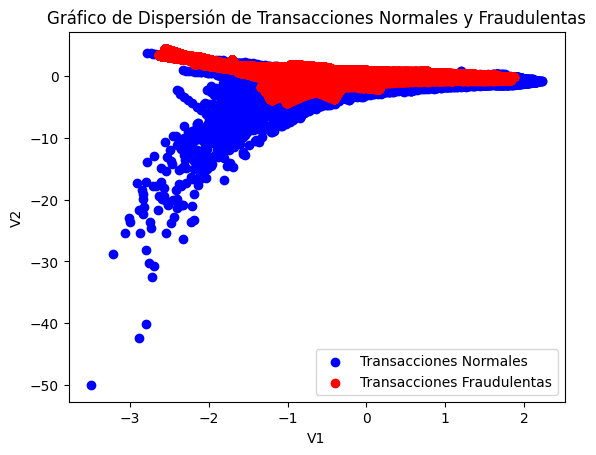

In [34]:
# Cargar el conjunto de datos
data = pd.read_csv('creditcard_2023.csv')

# Crear un gráfico de dispersión para las columnas 'V1' y 'V2' con colores diferentes para transacciones normales y fraudulentas
plt.scatter(data[data['Class'] == 0]['V1'], data[data['Class'] == 0]['V2'], c='b', label='Transacciones Normales')
plt.scatter(data[data['Class'] == 1]['V1'], data[data['Class'] == 1]['V2'], c='r', label='Transacciones Fraudulentas')

# Etiquetas de los ejes
plt.xlabel('V1')
plt.ylabel('V2')

# Título del gráfico
plt.title('Gráfico de Dispersión de Transacciones Normales y Fraudulentas')

# Leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()


A continuación, cargaremos el conjunto de datos y definiremos el likelihood, el prior y el posterior:


In [35]:
# Extraer las características y la columna 'Class'
X = data[['V1', 'V2', 'V3', 'V4', 'V5']]  # Usamos las primeras 5 características como ejemplo
y = data['Class']

# Definir el modelo de regresión logística
def log_likelihood(theta, x, y):
    logit = theta[0] + theta[1] * x['V1'] + theta[2] * x['V2'] + theta[3] * x['V3'] + theta[4] * x['V4'] + theta[5] * x['V5']
    p = 1 / (1 + np.exp(-logit))
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

def log_prior(theta):
    return 0  # Prior plano

def log_posterior(theta, x, y):
    return log_likelihood(theta, x, y) + log_prior(theta)

Luego, ejecutaremos el método MCMC para estimar los coeficientes:

In [37]:
# Definir el número de caminantes y pasos
nwalkers = 50
ndim = 6  # 5 coeficientes + 1 término independiente

# Inicializar los caminantes cerca de un valor inicial razonable
initial = np.array([0, 0, 0, 0, 0, 0]) + 0.1 * np.random.randn(nwalkers, ndim)

# Crear el objeto sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(X, y))

# Realizar MCMC
nsteps = 100
sampler.run_mcmc(initial, nsteps, progress=True)


  1%|          | 1/100 [00:01<03:11,  1.93s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  2%|▏         | 2/100 [00:04<03:20,  2.04s/it]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
 15%|█▌        | 15/100 [00:25<02:17,  1.61s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


State([[ 1.00781234e-03  1.66079688e-01 -6.74520654e-01 -9.25011296e-01
  -9.16924020e-02  8.10281125e-02]
 [-9.04482352e+00 -2.23648738e+00 -1.95015594e+00  3.82707791e-01
  -1.24957173e+00 -5.85283314e-01]
 [-6.88172739e-01 -9.31276890e-01 -6.28803965e-01  6.06792100e-01
   3.04784587e-01  1.38286318e-01]
 [ 1.37510988e+00  1.64823355e+00 -3.13177494e+00 -1.57521373e+00
   1.40727854e+00  7.01113071e-01]
 [-1.58245165e+01 -1.65848562e+01  5.44767475e+00 -1.14028992e+00
  -8.22387001e+00  2.48314845e+00]
 [ 1.49323894e+01  1.05331979e-01 -1.44526881e-01  6.31241618e-01
   2.75338183e+00  3.38953093e+00]
 [-1.00170470e+00 -7.45450957e-01 -1.84626186e+00 -1.50108128e+00
  -2.58971455e+00 -1.20433283e+00]
 [ 1.50976327e+00 -2.03393729e-01 -5.19893403e-01 -3.49930583e-01
   5.46105216e-01  1.79135027e-01]
 [ 2.06850145e-01 -4.79036140e-01 -4.52406030e-01  1.59605071e-01
  -7.16945099e-01  3.59348854e-01]
 [-3.03002079e+00  2.25689914e-01 -1.45176951e+00 -2.29643553e+00
  -3.56641705e-01  

Finalmente, podemos analizar los resultados y trazar las distribuciones posteriores de los coeficientes:

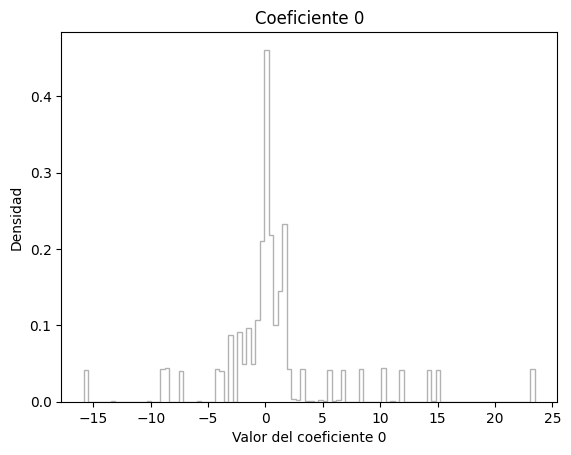

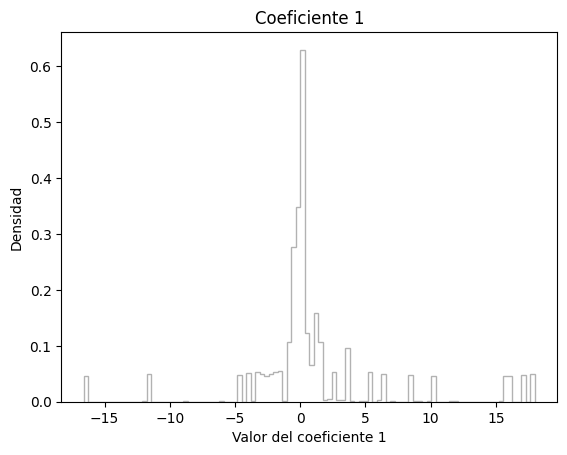

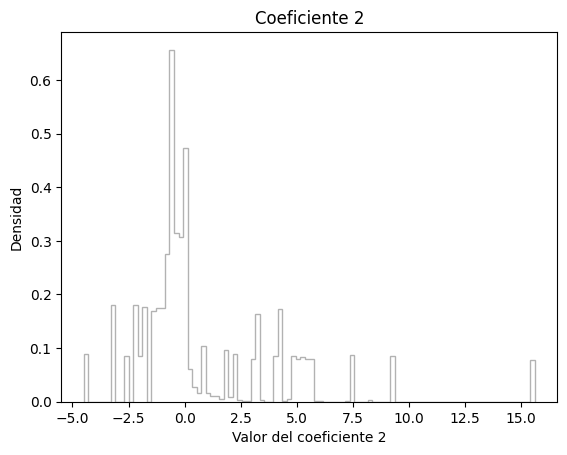

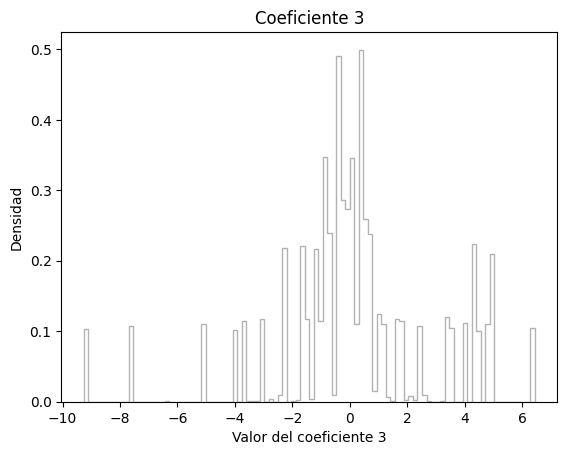

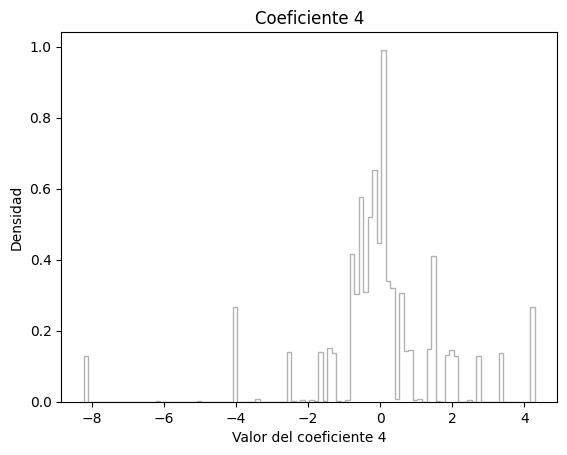

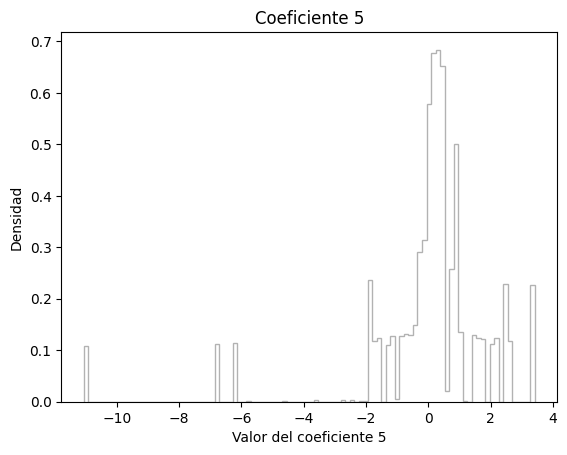

In [38]:
# Obtener las muestras de la cadena MCMC
samples = sampler.get_chain(flat=True)

# Graficar las distribuciones posteriores
for i in range(ndim):
    plt.hist(samples[:, i], 100, color="k", alpha=0.3, histtype="step", density=True)
    plt.title(f'Coeficiente {i}')
    plt.xlabel(f'Valor del coeficiente {i}')
    plt.ylabel('Densidad')
    plt.show()


Resultados del muestreo MCMC con corner plot


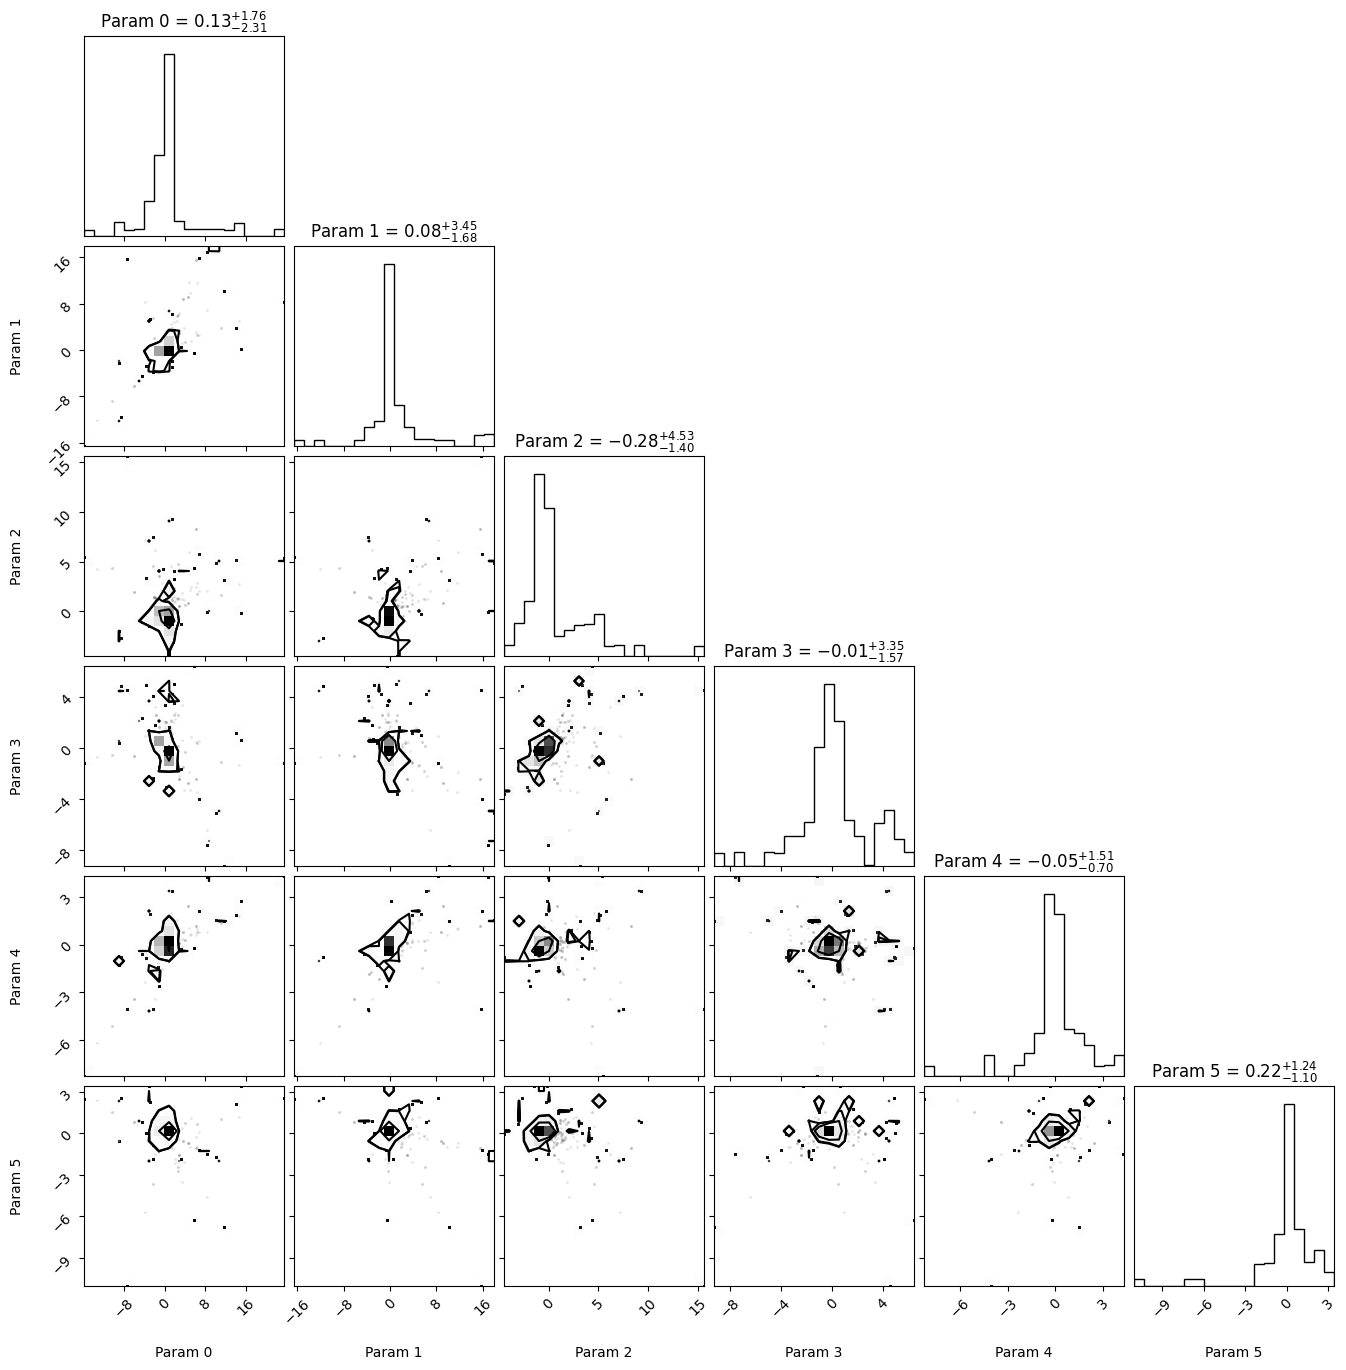

In [39]:
# Obtén las muestras de los caminantes
samples = sampler.chain[:, :, :].reshape((-1, ndim))  # Ajusta la forma de las muestras

# Etiquetas de los parámetros
labels = [f'Param {i}' for i in range(ndim)]

# Crea el corner plot
corner.corner(samples, labels=labels, show_titles=True)

# Muestra el gráfico
plt.show()

Cadenas de Markov asociadas a cada parametro

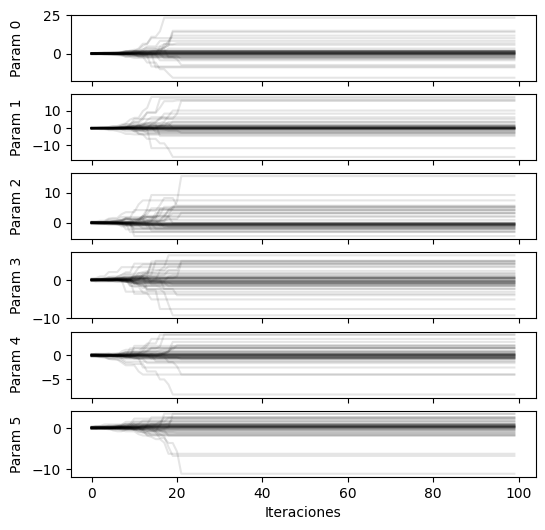

In [40]:
# Obtén las cadenas de Markov para cada parámetro
param_chains = [sampler.chain[:, :, i] for i in range(ndim)]

# Crea subplots para cada parámetro
fig, axes = plt.subplots(ndim, figsize=(6, 6), sharex=True)

for i in range(ndim):
    for j in range(nwalkers):
        axes[i].plot(param_chains[i][j], color='k', alpha=0.1)

    axes[i].set_ylabel(f'Param {i}')
    axes[i].yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel('Iteraciones')

plt.show()


En resumen, este enfoque bayesiano y el uso de cadenas de Markov son herramientas poderosas para estimar los parámetros de modelos complejos a partir de datos observados. Estos métodos proporcionan distribuciones de probabilidad completas de los parámetros, lo que permite evaluar la incertidumbre en las estimaciones y tomar decisiones informadas sobre la detección de transacciones fraudulentas en este caso particular.